# Problem statement

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Importing libraries

In [62]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
# head gives first 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
# Here are the all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
# all columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

# Missing Data

In [67]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that by heatmap and by numbers also , we have 177,687 and 2 rows have NAN values in Age, Cabin and Embarked columns
respectively

<AxesSubplot:>

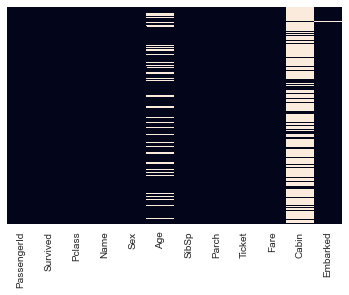

In [68]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [81]:
# looking for the counts of each column

In [80]:
for val in df:
    print(df[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Andersson, Mr. August Edvard ("Wennerstrom")    1
Dick, Mr. Albert Adrian                         1
Larsson, Mr. August Viktor                      1
Herman, Miss. Alice                             1
Lindell, Mr. Edvard Bengtsson                   1
                                               ..
Marechal, Mr. Pierre                            1
Molson, Mr. Harry Markland                      1
Andersson, Miss. Erna Alexandra                 1
Razi, Mr. Raihed                                1
Perkin, Mr. John Henry                          1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23

<AxesSubplot:xlabel='Survived', ylabel='count'>

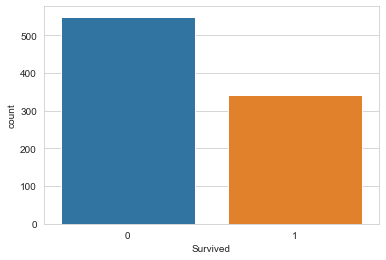

In [69]:
# Counting the number of people who has survived or not
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=df)

Here, 0 gives not survived which has more than 500 passengers and 1 gives the people who has survived which has around 350
passengers.

<AxesSubplot:xlabel='Survived', ylabel='count'>

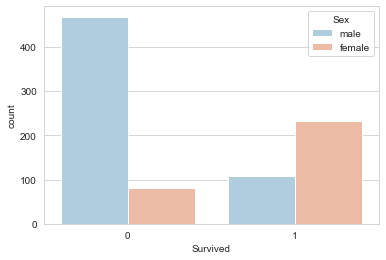

In [70]:
# Counting by Sex(male/female)
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

We can see that , around 460 males and 80 female have not survived , and around 105 male and 215 female have survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

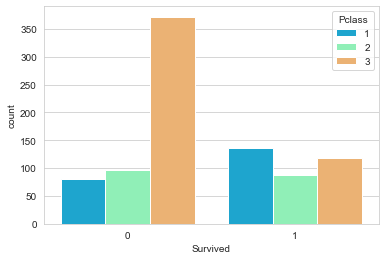

In [71]:
# counting by Pclass
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='Sex'>

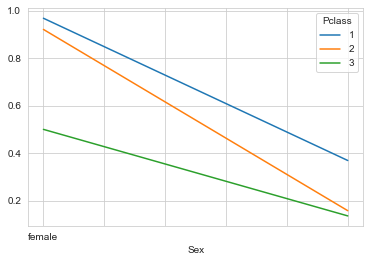

In [72]:
# Pivot table showing by Pclass and index sex
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()

<AxesSubplot:xlabel='Age'>

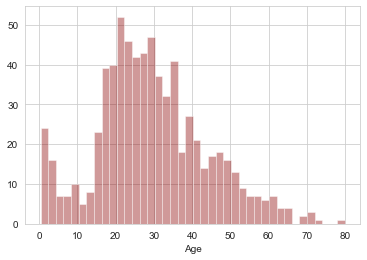

In [73]:
# plotting Age columns with no of passengers
sns.distplot(df['Age'].dropna(),kde=False,color='Darkred',bins=40)

The maximum number of passengers lies between age range from 20-30

<AxesSubplot:>

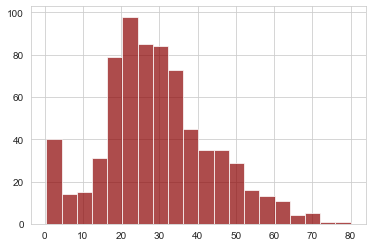

In [74]:
df['Age'].hist(bins=20,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

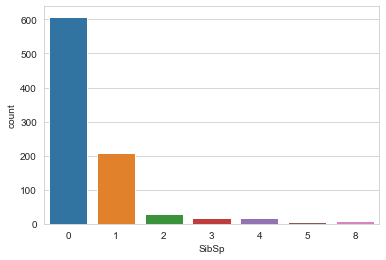

In [83]:
# countplot of sibling and spouse
sns.countplot(x='SibSp',data=df)

Maximum people doesn't have siblings or spouse

<AxesSubplot:>

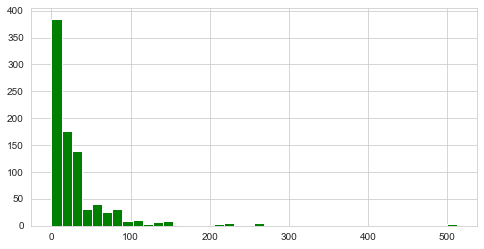

In [76]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

Fare count is decreasing 

# Data Cleaning

We want to fill the missing age values instead of just dropping the age data rows . We are just replacing by median of age to 
replace null values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

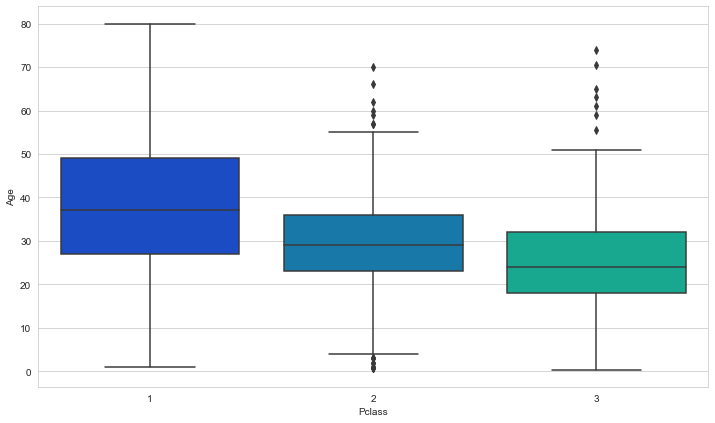

In [84]:
# Box plot by Pclass and age
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [85]:
# Replacing null values with median of age column
df['Age']=df['Age'].replace(np.NaN,df['Age'].median())

<AxesSubplot:>

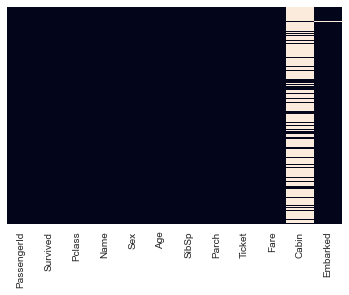

In [86]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Now, there is no null values in age column 

Dropping Cabin columns as it is of no use


In [87]:
df.drop('Cabin',axis=1,inplace=True)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [91]:
# dropping 2 rows which has null values
df.dropna(inplace=True)

In [90]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the null values have been removed.

# Converting Categorical Features

In [92]:
# number of category in embarked column
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [93]:
# number of category in sex column
df['Sex'].unique()

array(['male', 'female'], dtype=object)

# One-hot Encoding

In [95]:
# converting categorical into numerical columns i.e sex and Embarked

In [96]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [97]:
# Dropping Sex , Embarked , Name and Ticket column as it is of no use
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [99]:
# Adding df, sex and embark in same dataframe i.e. df
df = pd.concat([df,sex,embark],axis=1)

In [100]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Seperating target and independent variable into y and x resp.

In [104]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [105]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [ ]:
y.head()

# Splitting the data using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=101)

# Training and Testing

# Logistics Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [108]:
predictions = logmodel.predict(x_test)

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
accuracy = confusion_matrix(y_test,predictions)

In [111]:
accuracy

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8089887640449438

Accuracy of logistic regression is 81 percent

In [116]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [117]:
score = cross_val_score(logmodel, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 78.46193548387097


In [118]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
print("Accuracy is", knn.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(knn, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 62.172284644194754
Cross validation is 63.67096774193548


Knn score and cross-val score is 62 and 63 respectively

In [119]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(x_train,y_train)
print("Accuracy is", gauss.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(gauss, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 80.52434456928839
Cross validation is 78.29806451612903


Gaussian NB score and cross-val score is 80 and 78 respectively

In [120]:
#Using Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
print("Accuracy is", tree.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(tree, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 75.28089887640449
Cross validation is 74.75354838709677


Decision Tree classifier accuracy score and cross-val score is 75 and 74 respectively

In [121]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(x_train,y_train)
print("Accuracy is", forest.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(forest, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 82.77153558052434
Cross validation is 81.99741935483871


Random Forest Classifier accuracy score and cross-val score is 82 and 81 respectively

We can see that the our best model is Logistic Regression and now we are doing hyper parameter tuning

In [122]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [123]:
clf = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [124]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [125]:
#Lets see the best parameter as per the our grid search
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [126]:
lr = LogisticRegression(C=0.615848211066026, solver='liblinear',max_iter=5000, penalty='l1')
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)

Accuracy is 82.02247191011236


# Conclusion

We can see that the Logistics regression provide 82 percent of accuracy and model is performing good

# Saving the model

In [128]:
#importing joblib
import joblib

#saving the model in a pickle file
joblib.dump(lr,'FinalModel.pkl')

['FinalModel.pkl']